# Beautiful Soup

## First steps

[Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) is a Python library for retrieving data from HTML (and other XML) files. We will explore its basic functionality using the UB Math Department web page with graduate student directory as an example:

```
https://www.buffalo.edu/cas/math/people/grad-directory.html
```

In [4]:
# display the web page in the notebook
import IPython
url = "https://www.buffalo.edu/cas/math/people/grad-directory.html"
IPython.display.IFrame(url, width = 700, height = 600)

First, we will use `requests` to get the HTML code of the web page:

In [5]:
import requests
from pprint import pprint # just for nicer code output


grad_page = requests.get("http://www.buffalo.edu/cas/math/people/grad-directory.html").text
pprint(grad_page[:1000], width=80)

('<!DOCTYPE HTML><html lang="en" class="ubcms-63"><!-- cmspub01 0305-160301 '
 '--><head><meta http-equiv="X-UA-Compatible" content="IE=edge"/><meta '
 'http-equiv="content-type" content="text/html; charset=UTF-8"/><meta '
 'id="meta-viewport" name="viewport" '
 'content="width=device-width,initial-scale=1"/><script>if (screen.width > 720 '
 '&& screen.width < 960) '
 "document.getElementById('meta-viewport').setAttribute('content','width=960');</script><script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':new "
 "Date().getTime(),event:'gtm.js'});var "
 "f=d.getElementsByTagName(s)[0],j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src='https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);})(window,document,'script','dataLayer','GTM-T5KRRKT');</script><title>Graduate "
 'Students - Department of Mathematics - University at Buffalo</title><link '
 'rel="canonical" '
 'href="http://www.buffalo.edu/cas/math/people/grad-directory.ht

Next, we import `BeautifulSoup` and pass to it the HTML code of the web page to produce a `BeautifulSoup` object:

In [6]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(grad_page)

The first useful feature of this new object is that it can produce a nicer printout of the HTML code:

In [21]:
print(soup.prettify())

<!DOCTYPE HTML>
<html class="ubcms-63" lang="en">
 <!-- cmspub04 0303-123952 -->
 <head>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="width=device-width,initial-scale=1" id="meta-viewport" name="viewport"/>
  <script>
   if (screen.width > 720 && screen.width < 960) document.getElementById('meta-viewport').setAttribute('content','width=960');
  </script>
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src='https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);})(window,document,'script','dataLayer','GTM-T5KRRKT');
  </script>
  <title>
   Graduate Students - Department of Mathematics - University at Buffalo
  </title>
  <link href="http://www.buffalo.edu/cas/math/people/grad-directory.html" rel="canoni

The main content of the web page consists of contact information of math graduate students. Our goal will be to retrieve names of the students listed on the page. Looking at the code above we can see that each student listing is enclosed in the HTML paragraph tag `<p>....</p>`, e.g:
```HTML
<p>
 <b>
  Smith, John
  <br/>
 </b>
 Office: 118 Phone: 645-8880
 <br/>
 Email: jsmith123@buffalo.edu
</p>
```

We can use the `find_all()` method to search for all HTML tags of a given kind. For example, `soup.find_all('p')` returns a list of all paragraph tags:  

In [7]:
ptags = soup.find_all('p')
ptags[:10]

[<p><b><a href="https://www.buffalo.edu/coronavirus">COVID-19 Information</a>  •  3/4/2020 update</b></p>,
 <p><a href="#letter_a">A</a> | <a href="#letter_b">B</a> | <a href="#letter_c">C</a> | <a href="#letter_d">D</a> | E | <a href="#letter_f">F</a> | <a href="#letter_g">G</a> | <a href="#letter_h">H</a> | I | <a href="#letter_j">J</a> | <a href="#letter_h">K</a> | <a href="#letter_l">L</a> | <a href="#letter_m">M</a> | <a href="#letter_n">N</a> | <a href="#letter_o">O</a> | <a href="#letter_p">P</a> | Q | <a href="#letter_r">R</a> | <a href="#letter_s">S</a> | <a href="#letter_t">T</a> | <a href="#letter_u">U</a> | <a href="#letter_v">V</a> | <a href="#letter_w">W</a> | <a href="#letter_x">X</a> | <a href="#letter_y">Y</a> | <a href="#letter_z">Z</a></p>,
 <p><b>Abeya Ranasinghe Mudiyanselage, Asela V.</b><br/> Office: 138  Phone: 645-8823<br/> Email: aselavir@buffalo.edu</p>,
 <p><b>Ahn, Min Woong</b><br/> Office: 126  Phone: 645-8816<br/> Email: minwoong@buffalo.edu</p>,
 <p><b>A

Some items on the list (e.g. the first one) do not contain relevant information, but most of them are paragraphs with student data: 

In [8]:
ptags[10]

<p><b>Cosgrove, Gage (Makenzie)<br/> </b> Office: 139 Phone: 645-8824<br/> Email: gagecosg@buffalo.edu</p>

Inside a paragraph tag the name of a student is enclosed in the tag `<b>....</b>`indicating boldface text. We could use the `find_all()` method again to search for boldface tags in a paragraph, but in this example we can use the `find()` method as well. It returns the first occurrence of a given tag:  

In [9]:
print(ptags[10].find('b'))

<b>Cosgrove, Gage (Makenzie)<br/> </b>


The method `find()` returns `None` if the specified tag is not found. We can use this to filter out paragraphs which do not contain student names:

In [10]:
# this paragraph gives the address of the Math Department
ptags[-1]

<p>244 Mathematics Building<br/> Buffalo, NY 14260-2900<br/> Phone: (716) 645-6284<br/> Fax: (716) 645-5039</p>

In [11]:
print(ptags[-1].find('b'))

None


The `get_text()` method returns text contained in a specified HTML element:

In [13]:
name = ptags[10].find('b')
name.get_text()

'Cosgrove, Gage (Makenzie) '

Applying this to the list of paragraph tags with student data, we can extract names of all students:

In [11]:
for p in ptags[:10]: 
    name = p.find('b')
    if name is not None:   # skip paragraphs with no b-tags
        print(name.get_text())

Abeya Ranasinghe Mudiyanselage, Asela V.
Ahn, Min Woong
Alegria, Linda
Cain Charles
Casper, Michael 
Chang, Hong 
Chen, Yen-Lin 
Cheuk, Ka Yue 
Cosgrove, Gage (Makenzie) 
Deutsch, Dustin 


## Links

Links in HTML documents are defined by the `<a>` tag. For example:

```HTML
<a href="https://www.buffalo.edu">University at Buffalo</a>
```

will be displayed in a web browser as  [University at Buffalo](https://www.buffalo.edu). The `href` attribute specifies the address of the link destination, and the text between `<a>` and `</a>` is the visible text of the link.

Using Beautiful Soup we find links in the graduate student directory web page:

In [48]:
grad_links = soup.find_all('a')
grad_links[:10] # show the first 10 links

[<a href="#skip-to-content" id="skip-to-content-link">Skip to Content</a>,
 <a href="http://arts-sciences.buffalo.edu/">College of Arts and Sciences</a>,
 <a href="//www.buffalo.edu">UB Home</a>,
 <a href="//www.buffalo.edu/maps">Maps</a>,
 <a href="//www.buffalo.edu/directory/">UB Directory</a>,
 <a href="//www.buffalo.edu"> <i class="icon icon-ub-logo"></i><span class="ada-hidden">University at Buffalo</span> <span class="logo"> <img alt="" class="black" height="20" src="//www.buffalo.edu/v-be9166b6b4a1ea7e5771e2eba1d410cf/etc/designs/ubcms/images/header/ub-logo-black.png" width="181"/> </span> </a>,
 <a href="/cas/math.html">Department of Mathematics</a>,
 <a href="http://www.buffalo.edu/ub_admissions/apply-now.html" target="_blank"> Apply to UB </a>,
 <a href="http://www.buffalo.edu/cas/math/about-us/contact-us.html"> Contact Us </a>,
 <a href="https://ubfoundation.buffalo.edu/giving/index.php?action=use-parameters&amp;gift_allocation=9351124026" target="_blank"> Support UB Math </

Beautiful Soup lets us easily access attributes of any tag:

In [14]:
link = grad_links[7]
link

<a href="http://www.buffalo.edu/ub_admissions/apply-now.html" target="_blank"> Apply to UB </a>

In [22]:
link.attrs # get a dictionary of attributes of a tag

{'href': 'http://www.buffalo.edu/ub_admissions/apply-now.html',
 'target': '_blank'}

In [23]:
link['href'] # get the value of the 'href' attribute 

'http://www.buffalo.edu/ub_admissions/apply-now.html'

### Link formats

Notice that links addresses can be given in several different formats. 

An **absolute link**, with the whole address of the destination:

In [25]:
grad_links[1]

<a href="http://arts-sciences.buffalo.edu/">College of Arts and Sciences</a>

Also an absolute link, but the without the `http:` part: 

In [49]:
grad_links[2] 

<a href="//www.buffalo.edu">UB Home</a>

A **local link**, omitting the `http://www.buffalo.edu` part:

In [28]:
grad_links[6]

<a href="/cas/math.html">Department of Mathematics</a>

An **anchor**, which links to a specific part of the same page where the link is located. The full address would be `http://www.buffalo.edu/cas/math/people/grad-directory.html#letter_b`:

In [37]:
grad_links[99]

<a href="#letter_b">B</a>

## Images

Images in HTML documents are defined using the `<img>` tag:

In [17]:
image = soup.find('img')
image

<img alt="" class="black" height="20" src="//www.buffalo.edu/v-be9166b6b4a1ea7e5771e2eba1d410cf/etc/designs/ubcms/images/header/ub-logo-black.png" width="181"/>

Similarly as with links, each image tag has a `src` attribute which gives the address where the image file is located. 

In [18]:
image['src']

'//www.buffalo.edu/v-be9166b6b4a1ea7e5771e2eba1d410cf/etc/designs/ubcms/images/header/ub-logo-black.png'

We can use `requests` to download the image file, and `matplotlib` to display it:

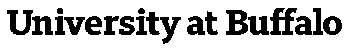

In [19]:
picture = requests.get('http:' + image['src']).content 
with open("ub_logo.png", 'wb') as f:   
    f.write(picture)
    
import matplotlib.pyplot as plt
with open("ub_logo.png", 'rb') as f:
    x = plt.imread(f)
plt.axis('off')
plt.imshow(x)
plt.show()

## Tables

Here is an example of an HTML code defining a simple table:

```HTML 
<table>
  <tr>
    <th>Item</th>
    <th>Quantity</th>
    <th>Price</th>
  </tr>
  <tr>
    <td>Tomatoes</td>
    <td>5</td>
    <td>$3</td>
  </tr>
  <tr>
    <td>Apples</td>
    <td>10</td>
    <td>$4.50</td>
  </tr>
</table> 
```
 
* The whole table is enclosed in the `<table>` tag.
* Each table row is defined by the `<tr>` tag. 
* Items in the row with table headers are enclosed in the `<th>` tag.
* Data in all other rows is specified using the  `<td>` tag.   

Here is a page which shows the table produced by the above code:

```
https://MTH548.github.io/supplements/table.html
```

In [3]:
table_url = "https://MTH548.github.io/supplements/table.html"
IPython.display.IFrame(table_url, width = 700, height = 85)

Let say that we want to use Beautiful Soup to find the quantity and price of apples the web page with the table. First, we get the page content:

In [21]:
page = requests.get(table_url).text
table_soup = BeautifulSoup(page)

Next, we find the table tag. Since the page contains only one table, the `find()` method can be used for this: 

In [22]:
table = table_soup.find('table')
table

<table style="width: 40%; border-collapse: collapse;">
<tr>
<th>Item</th>
<th>Quantity</th>
<th>Price</th>
</tr>
<tr>
<td>Tomatoes</td>
<td>5</td>
<td>$3</td>
</tr>
<tr>
<td>Apples</td>
<td>10</td>
<td>$4.50</td>
</tr>
</table>

We can find the cell of the table which contains the string "Apples" as follows:  

In [23]:
for cell in table.find_all('td'):
    if "Apples" in cell.get_text():
        apples_cell = cell
        break

apples_cell

<td>Apples</td>

We are interested in the cell appearing immediately after `apples_cell`  (for quantity), and the one after that (for price). The method `find_next()` comes useful here. It searches for the first occurrence of a tag of a specified kind after a given tag:

In [24]:
apples_cell.find_next('td') # find the first 'td' tag appearing after apples_cell

<td>10</td>

We can chain `find_next()` to search for subsequent tags:

In [25]:
apples_cell.find_next('td').find_next('td') # find the second 'td' tag appearing after apples_cell

<td>$4.50</td>